In [182]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels import regression
from statsmodels.tsa.stattools import coint
import datetime
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import seaborn as sb

now_ = datetime.datetime.now()
now = now_.strftime("%Y-%m-%d")
print(now)


end_date = now
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 80

2021-04-07


In [183]:
# THIS IS MY PORTFOLIO FOR ASSET MANAGEMENT COMPETITION 2021 WHERE 20+ BUSINESS SCHOOLS COMPETE
# MY TEAM'S NAME IS 'ORACLES OF IMPERIAL'
# We are currently ranked top 3 in the competition out of 100+ participants


# I have used top-down approach to select long stocks, and bottom-up approach to determine short stocks
# You can realize that the portfolio is resilient to external shocks
# Correlation with the market is literally ZERO!
# and the sharpe ratio is favorable
# portfolio delta is 0.90 now


# These are weights and stocks of the portfolio for each week

long_weights = [[0.12, 0.05, 0.08, 0.06,
               0.06, 0.07, 0.05, 0.08,
               0.07, 0.09, 0.07, 0.05, 
                0.09, 0.06, 0.05],
               
               [0.12, 0.07, 0.07, 0.08,
               0.08, 0.05, 0.06, 0.04,
               0.07, 0.09, 0.07, 0.05, 
                0.09, 0.06, 0.07], 
                
               [0.14, 0.10, 0.07, 0.08,
               0.08, 0.05, 0.06, 0.04,
               0.07, 0.09, 0.07, 0.08, 
                0.12, 0.06, 0.07],
                
               [0.14, 0.10, 0.07, 0.08,
               0.08, 0.05, 0.06, 0.08,
               0.07, 0.09, 0.07, 0.15, 
                0.12, 0.08, 0.07],
                
                [0.17, 0.10, 0.07, 0.08,
               0.08, 0.05, 0.06, 0.08,
                0.09, 0.07, 0.15, 
                0.12, 0.08, 0.07],
                
                [0.17, 0.10, 0.07, 0.08,
               0.08, 0.05, 0.06, 0.08,
                0.09, 0.07, 0.15, 
                0.12, 0.08, 0.07]
               ]

short_weights = [[0.05, 0.06, 0.05, 0.05,
                0.03, 0.02, 0.04],
                
                [0.03, 0.04, 0.06, 0.06,
                0.03, 0.02, 0.04, 0.04],
                
                [0.03, 0.06, 0.06,
                0.03, 0.02, 0.04, 0.04],
                 
                [0.03, 0.03, 0.06,
                0.05, 0.04, 0.07, 0.03, 0.07, 0.04],
                
                [0.03, 0.03,
                0.05, 0.04, 0.10, 0.03, 0.07, 0.04],
                
                [0.03, 0.03,
                0.05, 0.04, 0.10, 0.03, 0.07, 0.04]]

long_stocks = [['BRK-b', 'HSBA.L', 'TSLA', 
            'HUM', 'C', 'GS', 'CNP.PA', 'CVX', 
               'CINE.L', 'VOE.VI', 'AT1.DE', 
              'AIV', 'AV.L', 'BOSS.DE', 'NVO'],
               
              ['BRK-b', 'HSBA.L', 'ASML.AS', 
            'HUM', 'C', 'TOT', 'CNP.PA', 'CVX', 
               'CINE.L', 'VOE.VI', 'AT1.DE', 
              'AIV', 'AV.L', 'BOSS.DE', 'TGT'],
              
              ['BRK-b', 'HSBA.L', 'ASML.AS', 
            'HUM', 'C', 'TOT', 'CNP.PA', 'CVX', 
               'CINE.L', 'VOE.VI', 'AT1.DE', 
              'AIV', 'AV.L', 'BOSS.DE', 'TGT'],
              
              ['BRK-b', 'HSBA.L', 'ASML.AS', 
            'HUM', 'C', 'TOT', 'CNP.PA', 'CVX', 
               'CINE.L', 'VOE.VI', 'AT1.DE', 
              'AIV', 'AV.L', 'BOSS.DE', 'TGT'],
              
              ['BRK-b', 'HSBA.L', 'ASML.AS', 
            'HUM', 'C', 'TOT', 'CNP.PA', 'CVX', 
            'VOE.VI', 'AT1.DE', 
              'AIV', 'AV.L', 'BOSS.DE', 'TGT'],
              
              ['BRK-b', 'HSBA.L', 'ASML.AS', 
            'HUM', 'C', 'TOT', 'CNP.PA', 'CVX', 
            'VOE.VI', 'AT1.DE', 
              'AIV', 'AV.L', 'BOSS.DE', 'TGT']]

short_stocks = [['KMI', 'RMG.L', 'EVT.DE',
               'AFX.DE', 'CTEC.L', 'TOM.OL', 'XLNX'],
               
               ['KMI', 'RMG.L', 'UDR',
               'AFX.DE', 'CTEC.L', 'TOM.OL', 'QRVO', 'RCO.PA'],
               
               ['KMI', 'UDR', 'AFX.DE', 'CTEC.L', 
                'TOM.OL', 'QRVO', 'RCO.PA'],
               
               ['KMI', 'UDR', 'AFX.DE', 'CTEC.L', 
                'TOM.OL', 'QRVO', 'XLNX', 'REG', 'RCO.PA' ],
               
               ['UDR', 'AFX.DE', 'CTEC.L', 
                'TOM.OL', 'QRVO', 'XLNX', 'REG', 'RCO.PA' ],
               
               ['UDR', 'AFX.DE', 'CTEC.L', 
                'TOM.OL', 'QRVO', 'XLNX', 'REG', 'RCO.PA' ]]

In [184]:
import yfinance as yf
from pandas_datareader import data as pdr
g = globals()
import yfinance as yf
yf.pdr_override()

def weekly_performance(weeks, week, start, long_weights, short_weights, long_stocks, short_stocks):
    
    longs = pd.DataFrame([])
    shorts = pd.DataFrame([])
    
    date_end = datetime.datetime(2021, 2, 26) + relativedelta(days=(7*(week+1))+1)
    date_end = date_end.strftime("%Y-%m-%d")
        
    for i in long_stocks[week]:
        longs[i] = pdr.get_data_yahoo(i, start=start[week], end=date_end)['Adj Close']
    for i in short_stocks[week]:
        shorts[i] = pdr.get_data_yahoo(i, start=start[week], end=date_end)['Adj Close']
  
    for i in longs.columns:
        for j in range(len(longs[i])):
            if (longs[i][j] < 1 or longs[i][j] > -1) == False:
                
                if j == 0:
                    end_date_ = datetime.datetime(2021, 2, 26) + relativedelta(days=(7*(week))+1)
                    temporary = pdr.get_data_yahoo(i, start=start[week-1], end=end_date_)['Adj Close']
                    longs[i][j] = temporary[-1]                   
                else:
                    longs[i][j] = longs[i][j-1]
          
    for i in shorts.columns:
        for j in range(len(shorts[i])):
            if (shorts[i][j] < 1 or shorts[i][j] > -1) == False:
                if j == 0:
                    end_date_ = datetime.datetime(2021, 2, 26) + relativedelta(days=(7*(week))+1)
                    temporary = pdr.get_data_yahoo(i, start=start[week-1], end=end_date_)['Adj Close']
                    shorts[i][j] = temporary[-1]                    
                else:
                    shorts[i][j] = shorts[i][j-1]

    long_prices = longs.copy()
    short_prices = shorts.copy()

    for i in longs.columns:
        longs[i] = longs[i].pct_change()
    for i in shorts.columns:
        shorts[i] = shorts[i].pct_change()

    longs = longs.dropna()
    shorts = shorts.dropna()
    long_returns = pd.DataFrame([])
    for i in range(len(longs.columns)):
        long_returns[longs.columns[i]] = np.zeros(shape = (len(longs[longs.columns[i]])))
        for j in range(len(longs[long_returns.columns[i]])):
            if j == 0: 
                long_returns[longs.columns[i]][j] = 1000000*long_weights[week][i]*(1+longs[longs.columns[i]][j])
            else:
                long_returns[longs.columns[i]][j] = long_returns[longs.columns[i]][j-1]*(1+longs[longs.columns[i]][j])
            
    short_returns = pd.DataFrame([])
    for i in range(len(shorts.columns)):
        short_returns[shorts.columns[i]] = np.zeros(shape = (len(shorts[shorts.columns[i]])))
        for j in range(len(shorts[short_returns.columns[i]])):
            if j == 0: 
                short_returns[shorts.columns[i]][j] = 1000000*short_weights[week][i]*(1+shorts[shorts.columns[i]][j])
            else:
                short_returns[shorts.columns[i]][j] = short_returns[shorts.columns[i]][j-1]*(1+shorts[shorts.columns[i]][j])

    short_returns = -short_returns       
    portfolio = np.zeros(shape = (len(longs[longs.columns[i]])))
        
    long_sum = long_returns.sum(axis=1)
    short_sum = short_returns.sum(axis=1)
    portfolio = long_sum + short_sum
       
    performance = np.zeros(shape = (len(longs[longs.columns[i]])))
    
    portfolio_delta = 0
    for i in long_weights[week]:
        portfolio_delta += i*1000000
    for j in short_weights[week]:
        portfolio_delta += -j*1000000
    
    for j in range(len(portfolio)):
        if j == 0:
            performance[j] = (portfolio[j]-portfolio_delta)/(portfolio_delta + (1000000-portfolio_delta))
        else:
            performance[j] = (portfolio[j]-portfolio[j-1])/(portfolio[j-1] + (1000000-portfolio_delta))
            
    if week !=0:
        performance = performance*money_growth[week-1]
            
    performers_long = pd.DataFrame([])
    performers_short = pd.DataFrame([])
    
    for i in range(len(longs.columns)):
        performers_long[longs.columns[i]] = np.zeros(shape = (1))
        performers_long[longs.columns[i]][0] = (long_prices[longs.columns[i]][len(long_prices[longs.columns[i]])-1]-long_prices[longs.columns[i]][0])/long_prices[longs.columns[i]][0]
        
    for i in range(len(shorts.columns)):
        performers_short[shorts.columns[i]] = np.zeros(shape = (1))
        performers_short[shorts.columns[i]][0] = (short_prices[shorts.columns[i]][len(short_prices[shorts.columns[i]])-1]-short_prices[shorts.columns[i]][0])/short_prices[shorts.columns[i]][0]


    performers_long = performers_long.sort_values(0, axis=1, ascending=False)
    performers_short = performers_short.sort_values(0, axis=1, ascending=True)
    
    print('\n\n')
    print('LONG SIDE PERFORMANCES OF WEEK {}'.format(week))
    print('--------------------------------')
    for i in performers_long.columns:
        result = (round(performers_long[i][0], 4))
        print('{}: {}%'.format(i, round(100*result, 3)))
    print('\n\n')

    print('SHORT SIDE PERFORMANCES OF WEEK {}'.format(week))
    print('--------------------------------')
    for i in performers_short.columns:
        result = (round(performers_short[i][0], 4))
        print('{}: {}%'.format(i, round(100*result, 3)))
    print('\n\n')
    return portfolio, portfolio_delta, longs, shorts, long_prices, short_prices, long_returns, short_returns, performance
    


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

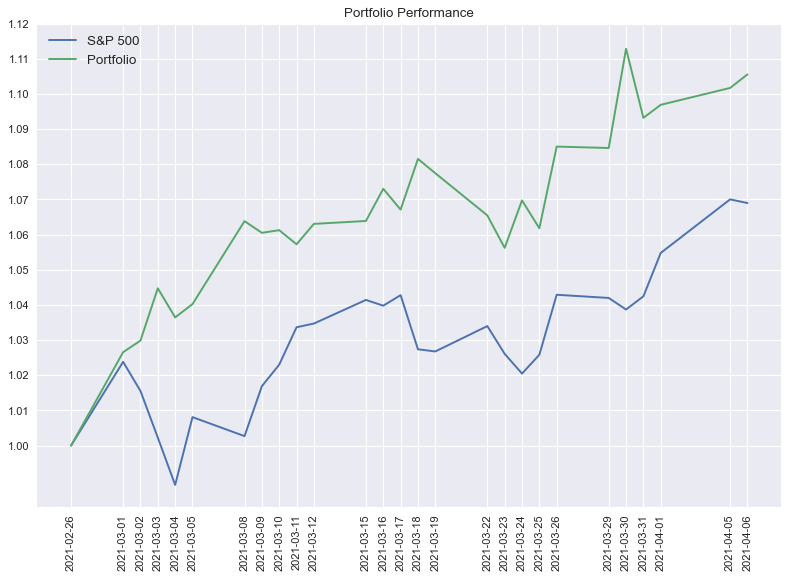

In [191]:
start = ['2021-02-26', '2021-03-05','2021-03-12','2021-03-19','2021-03-26','2021-04-02','2021-04-09','2021-04-16']
weeks = [0,1,2,3,4,5]
portfolio_performance = []
final_performance = []
index = []
returns = []
money_growth = []
growth = 1
for week in weeks:
    portfolio, portfolio_delta, longs, shorts, long_prices, short_prices, long_returns, short_returns, performance = weekly_performance(weeks, week, start, long_weights, short_weights, long_stocks, short_stocks)
    if week != 0:
        index.append(long_prices.index[1:])
    else:
        index.append(long_prices.index)
    print('Daily Performances of Week {}: '.format(week), performance)
    for i in range(len(performance)):
        portfolio_performance.append(performance[i])
 
    g['money_growth_during_week'] = [np.cumprod(1 + pd.Series(performance))][0][len(np.cumprod(1 + pd.Series(performance)))-1]
    growth = growth*money_growth_during_week
    money_growth.append(growth)
    print('\nOverall weekly performance: ', money_growth_during_week)    
    returns.append(performance)
    
returns_=[]
for i in range(len(returns)):
    for j in range(len(returns[i])):
        returns_.append(returns[i][j])
        

portfolio_performance = np.cumprod(1 + pd.Series(portfolio_performance))
for i in range(len(portfolio_performance)+1):
    if i == 0:
        final_performance.append(1)
    else:
        final_performance.append(portfolio_performance[i-1])
std = np.std(returns_)  
sharpe_ratio = ((final_performance[-1]/final_performance[0])**(1/len(final_performance))-1)/std
index_= []
for i in range(len(index)):
    for j in range(len(index[i])):
        index_.append(index[i][j])
        
sp500 = pdr.get_data_yahoo('^GSPC', start=start[0], end=end_date)['Adj Close']
sp500 = sp500.pct_change()
sp500 = np.cumprod(1 + pd.Series(sp500))
sp500_ = []
for i in range(len(sp500)):
    if i == 0:
        sp500_.append(1)
    else:
        sp500_.append(sp500[i])
for i in range(len(index_)):
    a = str(index_[i])[0:10]
    index_[i] = a
    
index_ = pd.to_datetime(index_)
print('\n\nSHARPE RATIO: ', round(sharpe_ratio,2))
print('CORRELATION WITH THE MARKET: ', round(np.corrcoef(pd.Series(final_performance).pct_change().dropna(), pd.Series(sp500_).pct_change().dropna())[0,1], 2))
plt.plot(index_, sp500_, label = 'S&P 500')
plt.plot(index_, final_performance, label= 'Portfolio')
plt.title('Portfolio Performance')
plt.legend(loc="upper left", fontsize =12)
plt.xticks(index_, rotation=90)
plt.yticks(np.arange(min(final_performance), round(max(final_performance)+0.01, 2), 0.01))

plt.show()

In [186]:
final_performance

[1,
 1.0265475603428804,
 1.029836954449282,
 1.0447116929289348,
 1.0364358789859265,
 1.040219593784114,
 1.063806817119297,
 1.0604859070596986,
 1.06123331979133,
 1.057228513943212,
 1.0630285486730977,
 1.063854574017431,
 1.0730072231845984,
 1.0670745515322666,
 1.0815005932194437,
 1.0774409883746212,
 1.0654412699376223,
 1.0562008602497697,
 1.0697060031316463,
 1.0617836330460306,
 1.0850075043282625,
 1.0846045424859263,
 1.112813201194863,
 1.093179528944653,
 1.096884501105411,
 1.1016839448828075,
 1.1055312326229676]

In [187]:
sp500_

[1,
 1.0237907635068002,
 1.0155176621844184,
 1.002248683095384,
 0.9888012981031321,
 1.0080789367648766,
 1.0026764088461144,
 1.016868934759812,
 1.0230009730648726,
 1.0336355663858936,
 1.0346851183852888,
 1.0414022127456763,
 1.0397675406313838,
 1.0427614287077838,
 1.027369707638527,
 1.0267505078322432,
 1.0339635513857046,
 1.026073526293571,
 1.0204636375458267,
 1.025811138293722,
 1.0428716111686578,
 1.0419663853810934,
 1.038676029613458,
 1.0424386325331652,
 1.0547656797008673,
 1.0699946254020536,
 1.0689529527298023]